In [18]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#importing datasets 
data_set= pd.read_excel("/content/drive/MyDrive/Vaccine-history-dataset/accuracynew-dataset.xlsx")

In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Total symptom  1048575 non-null  int64  
 1   VAX_MANU       1048575 non-null  int64  
 2   AGE_YRS        1048575 non-null  float64
 3   gender         1048575 non-null  int64  
 4   sym text       1048575 non-null  int64  
 5   recover        1048575 non-null  int64  
 6   history        1048575 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 56.0 MB


In [21]:
data_set.head()

,Total symptom,VAX_MANU,AGE_YRS,gender,sym text,recover,history
0,2,1,33.0,1,1,1,1
1,2,1,73.0,1,1,1,1
2,4,2,23.0,1,1,0,1
3,3,1,58.0,1,1,1,1
4,4,1,47.0,1,1,0,0


In [22]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values  

y= data_set.iloc[:, 4].values

In [23]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0) 

In [24]:
#feature Scaling
from sklearn.preprocessing import StandardScaler    

st_x= StandardScaler()  

x_train= st_x.fit_transform(x_train)    

x_test= st_x.transform(x_test)  

x_train



array([[ 0.97971574, -0.84148074],
       [ 0.97971574, -0.84148074],
       [-1.48084659,  1.18838133],
       ...,
       [-0.42091205, -0.84148074],
       [ 0.10905523, -0.84148074],
       [-1.48084659,  1.18838133]])

In [25]:
x_test

array([[-1.48084659,  1.18838133],
       [-1.48084659,  1.18838133],
       [ 1.13113497, -0.84148074],
       ...,
       [ 0.33618406, -0.84148074],
       [ 0.79044172, -0.84148074],
       [-1.48084659, -0.84148074]])

In [26]:
#Fitting Decision Tree classifier to the training set  

from sklearn.tree import DecisionTreeClassifier  

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
#Predicting the test set result  

y_pred= classifier.predict(x_test)

In [28]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  

cm= confusion_matrix(y_test, y_pred)  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


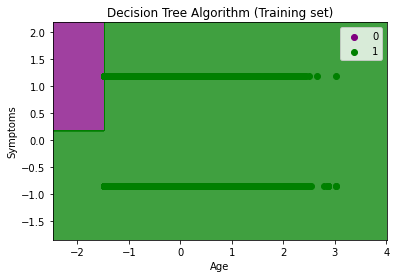

In [29]:
#Visulaizing the trianing set result  

from matplotlib.colors import ListedColormap  

x_set, y_set = x_train, y_train  

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  

nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  

alpha = 0.75, cmap = ListedColormap(('purple','green' )))  

mtp.xlim(x1.min(), x1.max())  

mtp.ylim(x2.min(), x2.max())  

for i, j in enumerate(nm.unique(y_set)):  

  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  

        c = ListedColormap(('purple', 'green'))(i), label = j)  

mtp.title('Decision Tree Algorithm (Training set)')  

mtp.xlabel('Age')  

mtp.ylabel('Symptoms')  

mtp.legend()  

mtp.show()  


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


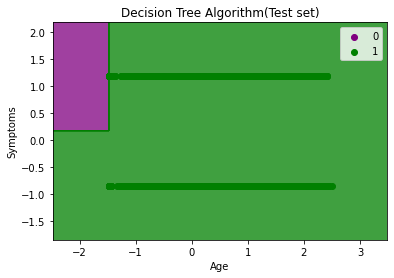

In [30]:
#Visulaizing the test set result  

from matplotlib.colors import ListedColormap  

x_set, y_set = x_test, y_test  

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  

nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  

alpha = 0.75, cmap = ListedColormap(('purple','green' )))  

mtp.xlim(x1.min(), x1.max())  

mtp.ylim(x2.min(), x2.max())  

for i, j in enumerate(nm.unique(y_set)):  

  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  

        c = ListedColormap(('purple', 'green'))(i), label = j)  

mtp.title('Decision Tree Algorithm(Test set)')  

mtp.xlabel('Age')  

mtp.ylabel('Symptoms')  

mtp.legend()  

mtp.show()